<div align="center">
<a href="https://vbti.nl"><img src="images/vbti_logo.png" width="400"></a>
</div>

# Classification
This notebook supports the 'Classification' topic of the 1-day masterclass "Machine Learning". It is not ment as a full course on machine learning, but rather gives you a flavor of the topic. For an in-depth training or consultancy please contact [VBTI](https://vbti.nl). 

Classification is a machine learning technique to learn to identify to which class a data point belongs. During the masterclass details of classification are explained. In this notebook you will build and train a classifier to identify the class of irises.

In [1]:
# import some default libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
In this example the well known Iris dataset is used. The datasets consists of 150 datapoints of 4 measured features of Iris plants, which belong to one of three classes. The challenge is to train a model that predicts the iris class given the features of a plant. 

<div align="center">
<img src="images/iris_petal_sepal.png" width="400">
</div>

First the data is imported and visualized.

In [2]:
from sklearn.datasets import load_iris

# load data from keras
iris  = load_iris()

# inspect what data is available
iris.keys()          

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# read data description
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

First check the data and create arrays (X, y) and pandas dataframe (df) objects to analyse the data,

In [4]:
print('Number of datapoints: {}\n'.format(iris['data'].shape[0]))
for i in range(len(iris['feature_names'])):
    print('Feature {}, name = {}'.format(i, iris['feature_names'][i]))

Number of datapoints: 150

Feature 0, name = sepal length (cm)
Feature 1, name = sepal width (cm)
Feature 2, name = petal length (cm)
Feature 3, name = petal width (cm)


In [5]:
# put data in 'standard' variables X and y
X, y = iris['data'], iris['target'] 

In [6]:
# also put the data in a data frame
# because the dataset is small, we can create these two sets of variables (X,y) and df
# with large datasets you setup more efficient datastructures
df = pd.DataFrame(data=X, columns=iris['feature_names'])
df['class'] = y
df['class'] = df['class'].apply(lambda x: iris['target_names'][x])
df.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    class  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

## Visualization

By visualizing the data you get a better intuition of the data. Standard python libraries such as [matplotlib](https://matplotlib.org) and [seaborn](https://seaborn.pydata.org/index.html) are used for data visualization.

Plotting a **histrogram** of a variables helps in understanding the range and distribution of values of that variable.

The seaborn library also has an easy function to plot scatterplots of all combinations of variables, together with the histogram of a variable. This function is called **pairplot**.

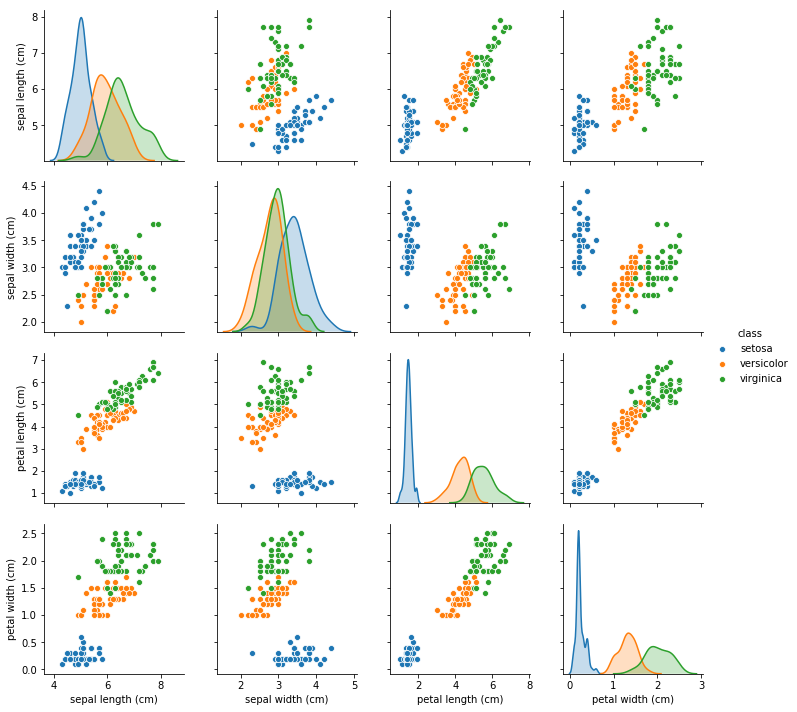

In [7]:
sns.pairplot(df, hue='class');

# Build  and train model

The [sklearn](https://scikit-learn.org/stable/) package contains many machine learning models for regression and classification. For this example the `Decision Tree` model is used.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

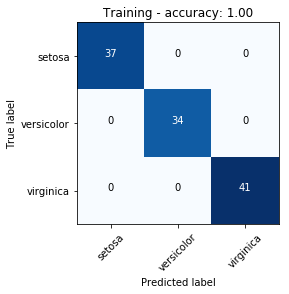

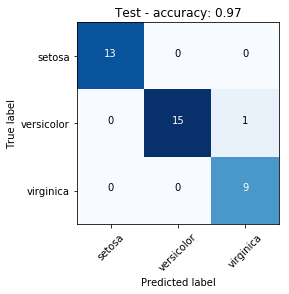

In [11]:
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix, accuracy

y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm_train, iris['target_names'], title='Training - accuracy: {:.2f}'.format(accuracy(y_train, y_train_pred)))

y_test_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_test, iris['target_names'], title='Test - accuracy: {:.2f}'.format(accuracy(y_test, y_test_pred)))

# How to go further from here?
This notebook provides a basic processing pipeline for building a classification model. Such a model is often used as a **baseline** model, because it can be trained quickly. Try using different classification models from [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) 